In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
employ = np.genfromtxt('datasets_cleaned/employment/employ.csv', delimiter=',', dtype=['i8','U64','f8','f8','i8'], names=True)
poly = np.genfromtxt('datasets_cleaned/poly/poly_intake.csv', delimiter=',', dtype=['i8','U8','U64','i8','i8','i8'], names=True)
uni = np.genfromtxt('datasets_cleaned/uni/uni_intake.csv', delimiter=',', dtype=['i8','U8','U64','i8','i8','i8'], names=True)

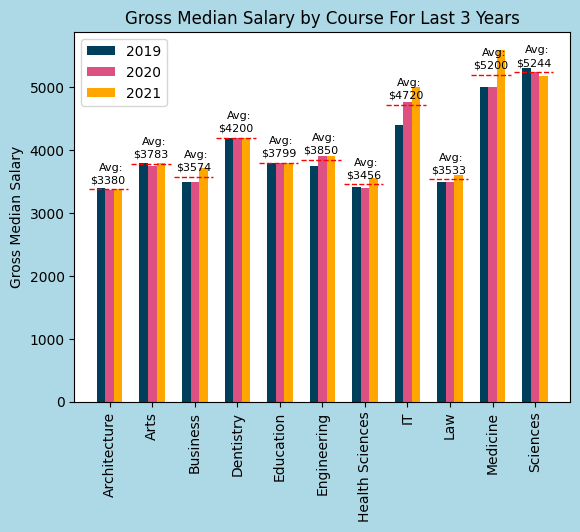

In [45]:
# Chart 1
# Gross Median Salary of each course for the past three years
labels = np.unique(employ['course_cluster'])

N = len(labels)
C = [0]*(2022-2019)
for i in range(2019,2022):
    C[i-2019] = employ['gross_median_salary'][employ['year'] == i]
width = 0.2

fig, ax = plt.subplots()
fig.set_facecolor("lightblue")
# 2019
rects1 = ax.bar(np.arange(N) - width, C[0], width, label='2019', color='#003f5c')

# 2020
rects2 = ax.bar(np.arange(N), C[1], width, label='2020',color='#dd5182')


# 2021
rects3 = ax.bar(np.arange(N) + width, C[2], width, label='2021',color='#ffa600')

for i in range(11):
# add a horizontal line for each label
    min_x = i*120/1400+27/700
    ax.axhline((C[0][i]+C[1][i]+C[2][i])/3, color='r', linestyle='--', linewidth = 1,xmin=min_x-0.01, xmax=min_x+0.07)
    ax.text(i-0.45, (C[0][i]+C[1][i]+C[2][i])/3+100, f'${round((C[0][i]+C[1][i]+C[2][i])/3)}',fontsize=8,color='black')
    ax.text(i-0.25, (C[0][i]+C[1][i]+C[2][i])/3+300, 'Avg:',fontsize=8,color='black')
    




ax.legend()
ax.set_xticks(np.arange(N))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Gross Median Salary')
ax.set_title('Gross Median Salary by Course For Last 3 Years')



plt.show()

In [46]:
print(np.unique(uni['course']))

['Architecture' 'Arts' 'Business' 'Dentistry' 'Education' 'Engineering'
 'Health Sciences' 'IT' 'Law' 'Medicine' 'Sciences']


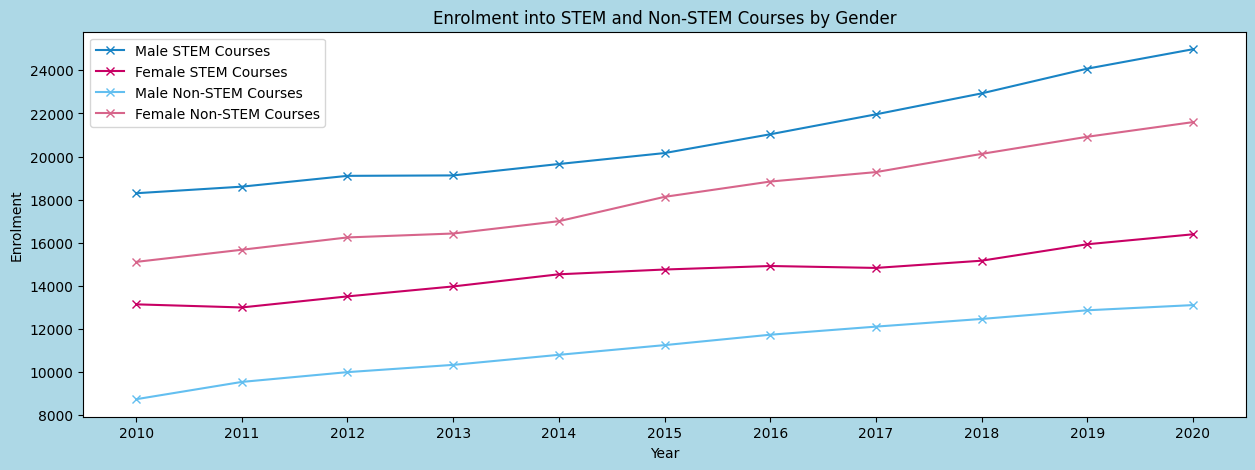

In [47]:
# Chart 2
# Trend of STEM course enrollment and non-STEM course enrollment for different genders over the past 10 years
labels = np.unique(uni['course'])
M_S_courses = [0]*(2021-2010)
M_NS_courses = [0]*(2021-2010)
F_S_courses = [0]*(2021-2010)
F_NS_courses = [0]*(2021-2010)

# ~ returns those not in the list
# Little read up on truth error in numpy: https://note.nkmk.me/en/python-numpy-pandas-value-error-ambiguous/
for i in range(2010,2021):
    M_NS_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='M') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    M_S_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='M') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    F_NS_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='F') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    F_S_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='F') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()

xlabels = np.arange(2010,2021)
fig = plt.figure()
fig.set_facecolor("lightblue")
# The same as plt.figure(figsize(15,5))
fig.set_size_inches(15, 5)


plt.plot(M_S_courses,label='Male STEM Courses',color='#1984c5',marker='x')
plt.plot(F_S_courses,label='Female STEM Courses',color='#c80064',marker='x')
plt.plot(M_NS_courses,label='Male Non-STEM Courses',color='#63bff0',marker='x')
plt.plot(F_NS_courses,label='Female Non-STEM Courses',color='#d7658b',marker='x')

plt.xticks(np.arange(11),xlabels)
plt.legend()
plt.ylabel('Enrolment')
plt.xlabel('Year')
plt.title('Enrolment into STEM and Non-STEM Courses by Gender')
plt.show()